In [14]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 5 - Principal and Minor Eigenvectors of a Matrix Sequence
# IT - Comparison of Adaptive EVD Homogeneous, Deflated, Weighted
#
# Author: Chanchal Chatterjee
#

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [54]:
# Number of samples N and dimension D
nSamples = 1000
nDim     = 10
nEA      = 4
nEpochs  = 3


In [55]:
# Generate the covX random matrices
cov = 3*np.array([ \
    [ 0.4270,  0.0110, -0.0050, -0.0250,  0.0890, -0.0790, -0.0190,  0.0740,  0.0890,  0.0050 ], \
    [ 0.0110,  5.6900, -0.0690, -0.2820, -0.7310,  0.0900, -0.1240,  0.1000,  0.4320, -0.1030 ], \
    [-0.0050, -0.0690,  0.0800,  0.0980,  0.0450, -0.0410,  0.0230,  0.0220, -0.0350,  0.0120 ], \
    [-0.0250, -0.2820,  0.0980,  2.8000, -0.1070,  0.1500, -0.1930,  0.0950, -0.2260,  0.0460 ], \
    [ 0.0890, -0.7310,  0.0450, -0.1070,  3.4400,  0.2530,  0.2510,  0.3160,  0.0390, -0.0100 ], \
    [-0.0790,  0.0900, -0.0410,  0.1500,  0.2530,  2.2700, -0.1800,  0.2950, -0.0390, -0.1130 ], \
    [-0.0190, -0.1240,  0.0230, -0.1930,  0.2510, -0.1800,  0.3270,  0.0270,  0.0260, -0.0160 ], \
    [ 0.0740,  0.1000,  0.0220,  0.0950,  0.3160,  0.2950,  0.0270,  0.7270, -0.0960, -0.0170 ], \
    [ 0.0890,  0.4320, -0.0350, -0.2260,  0.0390, -0.0390,  0.0260, -0.0960,  0.7150, -0.0090 ], \
    [ 0.0050, -0.1030,  0.0120,  0.0460, -0.0100, -0.1130, -0.0160, -0.0170, -0.0090,  0.0650 ]])
print(cov/3)

[[ 4.27e-01  1.10e-02 -5.00e-03 -2.50e-02  8.90e-02 -7.90e-02 -1.90e-02
   7.40e-02  8.90e-02  5.00e-03]
 [ 1.10e-02  5.69e+00 -6.90e-02 -2.82e-01 -7.31e-01  9.00e-02 -1.24e-01
   1.00e-01  4.32e-01 -1.03e-01]
 [-5.00e-03 -6.90e-02  8.00e-02  9.80e-02  4.50e-02 -4.10e-02  2.30e-02
   2.20e-02 -3.50e-02  1.20e-02]
 [-2.50e-02 -2.82e-01  9.80e-02  2.80e+00 -1.07e-01  1.50e-01 -1.93e-01
   9.50e-02 -2.26e-01  4.60e-02]
 [ 8.90e-02 -7.31e-01  4.50e-02 -1.07e-01  3.44e+00  2.53e-01  2.51e-01
   3.16e-01  3.90e-02 -1.00e-02]
 [-7.90e-02  9.00e-02 -4.10e-02  1.50e-01  2.53e-01  2.27e+00 -1.80e-01
   2.95e-01 -3.90e-02 -1.13e-01]
 [-1.90e-02 -1.24e-01  2.30e-02 -1.93e-01  2.51e-01 -1.80e-01  3.27e-01
   2.70e-02  2.60e-02 -1.60e-02]
 [ 7.40e-02  1.00e-01  2.20e-02  9.50e-02  3.16e-01  2.95e-01  2.70e-02
   7.27e-01 -9.60e-02 -1.70e-02]
 [ 8.90e-02  4.32e-01 -3.50e-02 -2.26e-01  3.90e-02 -3.90e-02  2.60e-02
  -9.60e-02  7.15e-01 -9.00e-03]
 [ 5.00e-03 -1.03e-01  1.20e-02  4.60e-02 -1.00e-02 -1.

In [56]:
from scipy.linalg import eigh

eigvals, eigvecs = eigh(cov)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
np.random.seed(1)
R = np.random.normal(0, 1, (nDim, nSamples))
X = V @ D @ R


eigvals =
 [17.90133833 10.22120991  8.60784587  6.53607089  2.23956443  1.83686292
  1.1360816   0.76926447  0.22448354  0.15027803]


In [57]:
# Square root of the correlation matrix
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

EstV = np.fliplr(eigvecs)
EstD  = np.diag(eigvals[::-1])


eigvals =
 [18.53229211  9.96275456  8.22649132  6.49303143  2.18744078  1.78819646
  1.10981331  0.775472    0.21628752  0.14209759]


In [66]:
# Adaptive algorithm
from numpy import linalg as la
from numpy.linalg import inv

A  = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
W1 = 0.1 * np.ones(shape=(nDim,nEA)) # weight vectors of all algorithms
W2 = W1
W3 = W1
c = [2-0.3*k for k in range(nEA)]
C = np.diag(c)

cos_t1 = np.zeros(shape=(nEA, nSamples*nEpochs)) # cosine error
cos_t2 = np.zeros(shape=(nEA, nSamples*nEpochs)) # cosine error
cos_t3 = np.zeros(shape=(nEA, nSamples*nEpochs)) # cosine error

for epoch in range(nEpochs):
    for iter in range(nSamples):
        cnt = nSamples*epoch + iter

        x = X[:,iter]
        x = x.reshape(nDim,1)
        A = A + (1.0/(1 + cnt))*((np.dot(x, x.T)) - A)

        # Homogeneous Gradient Descent
        W1 = W1 + (1/(50 + cnt))*(A @ W1 - W1 @ (W1.T @ A @ W1)) @ inv(np.diag(np.diagonal(W1.T @ A @ W1)))

        # Deflated Gradient Descent
        W2 = W2 + (1/(20 + cnt))*(A @ W2 - W2 @ np.triu(W2.T @ A @ W2)) @ inv(np.diag(np.diagonal(W2.T @ A @ W2)))

        # Weighted Gradient Descent
        W3 = W3 + (1/(10 + cnt))*(A @ W3 @ C - W3 @ C @ (W3.T @ A @ W3)) @ inv(np.diag(np.diagonal(W3.T @ A @ W3)))
 
        for i in range(nEA):
            u1 = W1[:,i]/la.norm(W1[:,i])
            u1 = u1.reshape(nDim,1)
            u2 = W2[:,i]/la.norm(W2[:,i])
            u2 = u2.reshape(nDim,1)
            u3 = W3[:,i]/la.norm(W3[:,i])
            u3 = u3.reshape(nDim,1)
            vi = EstV[:,i].reshape(nDim,1)
            cos_t1[i,cnt] = abs(u1.T @ vi)
            cos_t2[i,cnt] = abs(u2.T @ vi)
            cos_t3[i,cnt] = abs(u3.T @ vi)


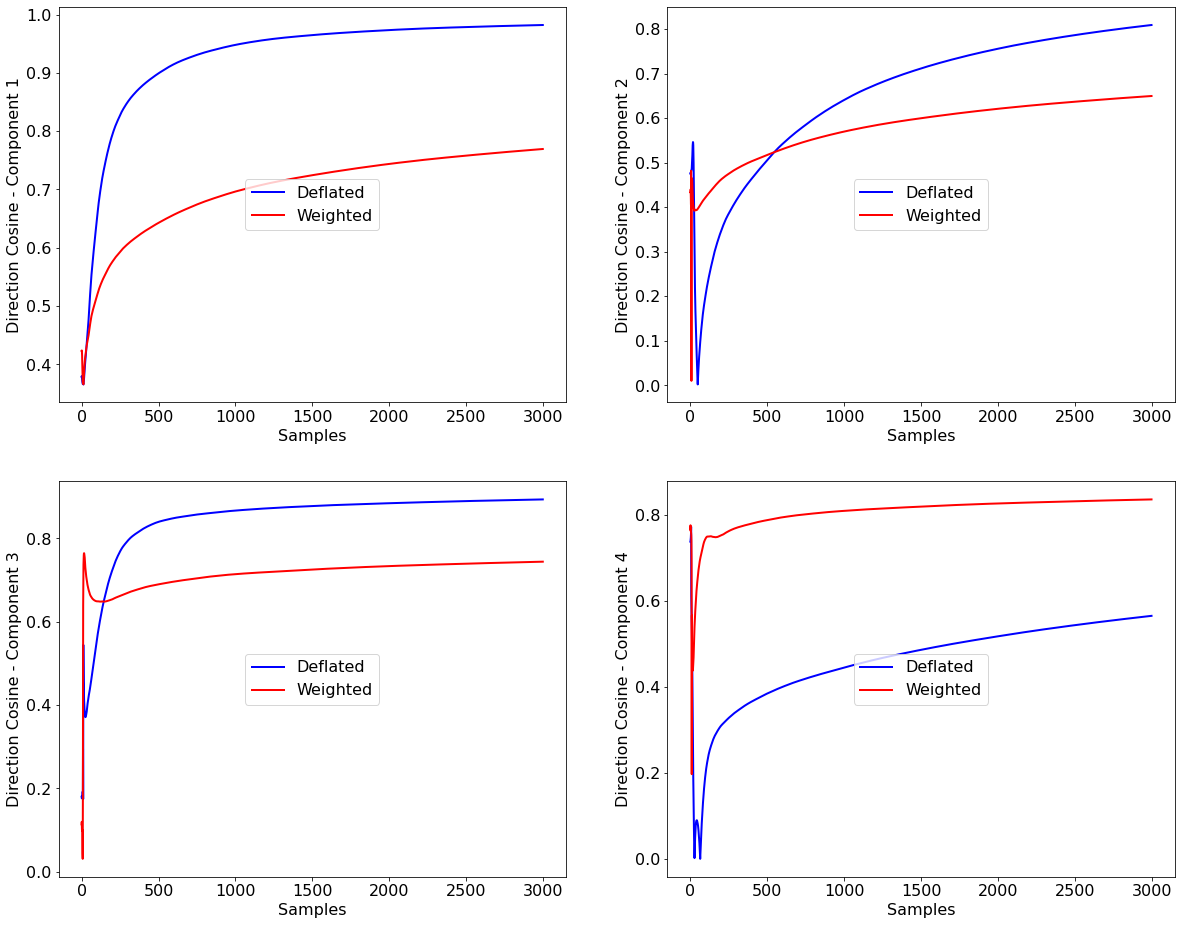

In [67]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plt.plot(cos_t2[0,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[0,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 1')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 2)
plt.plot(cos_t2[1,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[1,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 2')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 3)
plt.plot(cos_t2[2,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[2,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 3')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 4)
plt.plot(cos_t2[3,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[3,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 4')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()